In [586]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from main_numpy import NeuronModel


In [73]:
def create_2d_grid_graph(rows, columns):
    """Returns network as 2D grid graph and nodes on the periphery are connected to sink"""
    grid_graph = nx.grid_2d_graph(rows, columns)
    converted_graph = nx.convert_node_labels_to_integers(grid_graph)
    converted_graph.add_node(-1)  # Add sink node

    for node in converted_graph.nodes():
        if converted_graph.degree(node) < 4:
            converted_graph.add_edge(node, -1)  # Add edge to sink node

    return converted_graph

Testing the code

In [ ]:
rows = 10
columns = 10

grid_network = create_2d_grid_graph(rows, columns)
grid_network_model = NeuronModel(grid_network)   
grid_network_data = np.array(grid_network_model.run(100000))  # number of steps

In [ ]:
norm_grid_network_data = [aval_size/max(grid_network_data) for aval_size in grid_network_data] #to scale data

plt.figure()
plt.plot(norm_grid_network_data)

# Add labels and title
plt.xlabel('time step')
plt.ylabel('Scaled Avalanche size')
plt.title('2D grid graph: Time series')

# Show the plot
plt.show()   

In [ ]:
# Calculate the unique avalanche sizes and their frequencies
avalanche_sizes_grid, frequencies_grid = np.unique(grid_network_data, return_counts=True)

# Plot the data points on a log-log scale
plt.figure()
plt.scatter(avalanche_sizes_grid, frequencies_grid)

# Set log-log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Avalanche Size (log)')
plt.ylabel('Frequency (log)')
plt.title('Frequency Distribution of Avalanche Sizes in 2D grid network')

# Show the plot
plt.show()

Create data for different network size (create networks and then simulate)

In [155]:
grid_network_10 = create_2d_grid_graph(10, 10)
grid_network_model_10 = NeuronModel(grid_network_10)   
grid_network_data_10 = np.array(grid_network_model_10.run(50000))  # number of steps

In [74]:
grid_network_20 = create_2d_grid_graph(20, 20)
grid_network_model_20 = NeuronModel(grid_network_20)   
grid_network_data_20 = np.array(grid_network_model_20.run(50000))  # number of steps

In [75]:
grid_network_40 = create_2d_grid_graph(40, 40)
grid_network_model_40 = NeuronModel(grid_network_40)   
grid_network_data_40 = np.array(grid_network_model_40.run(50000))  # number of steps

In [139]:
grid_network_100 = create_2d_grid_graph(100, 100)  ###### 
grid_network_model_100 = NeuronModel(grid_network_100)   
grid_network_data_100 = np.array(grid_network_model_100.run(50000))  # number of steps

In [147]:
grid_network_60 = create_2d_grid_graph(60, 60)
grid_network_model_60 = NeuronModel(grid_network_60)   
grid_network_data_60 = np.array(grid_network_model_60.run(50000))  # number of steps

Plot the simulated data

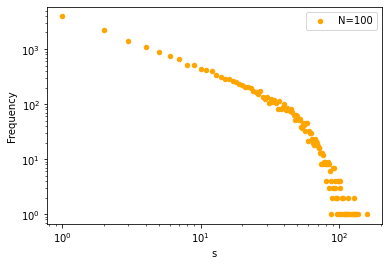

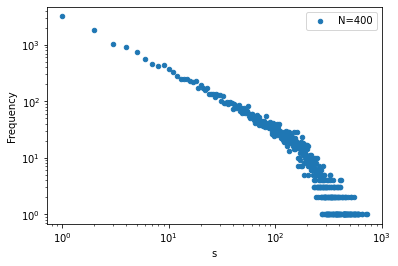

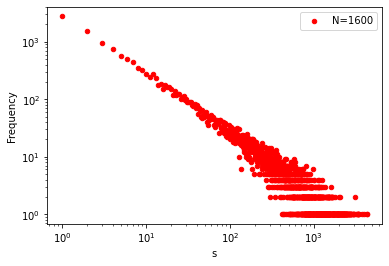

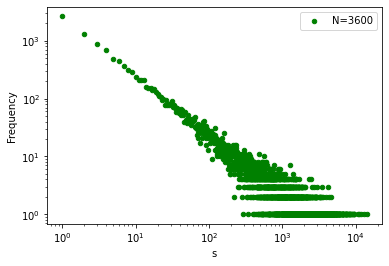

In [159]:
# Calculate the unique avalanche sizes and their frequencies
avalanche_sizes_grid_10, frequencies_grid_10 = np.unique(grid_network_data_10, return_counts=True)
avalanche_sizes_grid_20, frequencies_grid_20 = np.unique(grid_network_data_20, return_counts=True)
avalanche_sizes_grid_40, frequencies_grid_40 = np.unique(grid_network_data_40, return_counts=True)
avalanche_sizes_grid_60, frequencies_grid_60 = np.unique(grid_network_data_60, return_counts=True)

# Plot the data points on a log-log scale
plt.figure()
plt.scatter(avalanche_sizes_grid_10, frequencies_grid_10, s= 20, color ="orange", label="N=100")
# Set log-log scale
plt.xscale('log')
plt.yscale('log')
# Add labels and title
plt.xlabel('s')
plt.ylabel('Frequency')
#plt.title('Frequency Distribution of Avalanche Sizes in 2D grid network')
plt.legend()
plt.savefig('2d_grid_graph_N100_scatter.png', dpi = 300)
# Show the plot
plt.show()

plt.figure()
plt.scatter(avalanche_sizes_grid_20, frequencies_grid_20, s= 20, label="N=400")
# Set log-log scale
plt.xscale('log')
plt.yscale('log')
# Add labels and title
plt.xlabel('s')
plt.ylabel('Frequency')
#plt.title('Frequency Distribution of Avalanche Sizes in 2D grid network')
plt.legend()
plt.savefig('2d_grid_graph_N400_scatter.png', dpi = 300)
# Show the plot
plt.show()

plt.figure()
plt.scatter(avalanche_sizes_grid_40, frequencies_grid_40, s= 20, color = "r", label="N=1600")
# Set log-log scale
plt.xscale('log')
plt.yscale('log')
# Add labels and title
plt.xlabel('s')
plt.ylabel('Frequency')
#plt.title('Frequency Distribution of Avalanche Sizes in 2D grid network')
plt.legend()
# Show the plot
plt.savefig('2d_grid_graph_N1600_scatter.png', dpi = 300)
plt.show()

plt.figure()
plt.scatter(avalanche_sizes_grid_60, frequencies_grid_60, s= 20, color= "g", label="N=3600")
# Set log-log scale
plt.xscale('log')
plt.yscale('log')
# Add labels and title
plt.xlabel('s')
plt.ylabel('Frequency')
#plt.title('Frequency Distribution of Avalanche Sizes in 2D grid network')
plt.legend()
plt.savefig('2d_grid_graph_N3600_scatter.png', dpi = 300)



Fitting with curve (power law with exponential cutoff) and creating probability density 

In [582]:
# to get exponent by fitting data with large node size
def power_law(x, a, b):
    return a* x**-b  

avalanche_sizes_grid_100, frequencies_grid_100 = np.unique(grid_network_data_100, return_counts=True)
popt_100, pcov_100 = curve_fit(power_law, avalanche_sizes_grid_100, frequencies_grid_100)

x_fit_100 = np.logspace(np.log10(min(avalanche_sizes_grid_100)), np.log10(max(avalanche_sizes_grid_100)), 1000)
y_fit_100 = power_law(x_fit_100, *popt_100)
norm_constant_100 = np.trapz(y_fit_100, x=x_fit_100)
pdf_fit_100 = y_fit_100 / norm_constant_100

a_100, b_100 = popt_100
print(b_100)  ## estimated critical exponent


1.1419330179810647


<ipython-input-559-a7d31cb05c67>:3: RuntimeWarning: overflow encountered in power
  return a* x**-b * np.exp(-c * x)
<ipython-input-559-a7d31cb05c67>:3: RuntimeWarning: overflow encountered in multiply
  return a* x**-b * np.exp(-c * x)
<ipython-input-559-a7d31cb05c67>:3: RuntimeWarning: overflow encountered in exp
  return a* x**-b * np.exp(-c * x)


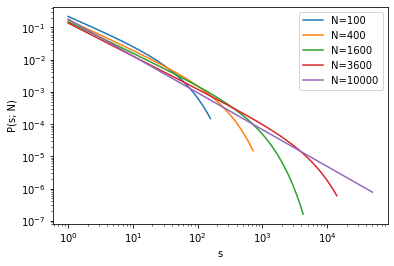

In [559]:
# Define the model function (Power law with exponential cutoff)
def power_law_with_exponential_cutoff(x, a, b, c):
    return a* x**-b * np.exp(-c * x) 

# Perform curve fitting
popt_20, pcov_20 = curve_fit(power_law_with_exponential_cutoff, avalanche_sizes_grid_20, frequencies_grid_20)
popt_40, pcov_40 = curve_fit(power_law_with_exponential_cutoff, avalanche_sizes_grid_40, frequencies_grid_40)
popt_60, pcov_60 = curve_fit(power_law_with_exponential_cutoff, avalanche_sizes_grid_60, frequencies_grid_60)
popt_10, pcov_10 = curve_fit(power_law_with_exponential_cutoff, avalanche_sizes_grid_10, frequencies_grid_10)


# Generate fitted curve values
x_fit_20 = np.logspace(np.log10(min(avalanche_sizes_grid_20)), np.log10(max(avalanche_sizes_grid_20)), 1000)
y_fit_20 = power_law_with_exponential_cutoff(x_fit_20, *popt_20)
x_fit_40 = np.logspace(np.log10(min(avalanche_sizes_grid_40)), np.log10(max(avalanche_sizes_grid_40)), 1000)
y_fit_40 = power_law_with_exponential_cutoff(x_fit_40, *popt_40)
x_fit_60 = np.logspace(np.log10(min(avalanche_sizes_grid_60)), np.log10(max(avalanche_sizes_grid_60)), 1000)
y_fit_60 = power_law_with_exponential_cutoff(x_fit_60, *popt_60)
x_fit_10 = np.logspace(np.log10(min(avalanche_sizes_grid_10)), np.log10(max(avalanche_sizes_grid_10)), 1000)
y_fit_10 = power_law_with_exponential_cutoff(x_fit_10, *popt_10)


# Calculate normalization constant (integral over the defined range)
norm_constant_20 = np.trapz(y_fit_20, x=x_fit_20)
norm_constant_40 = np.trapz(y_fit_40, x=x_fit_40)
norm_constant_60 = np.trapz(y_fit_60, x=x_fit_60)
norm_constant_10 = np.trapz(y_fit_10, x=x_fit_10)

# Normalize the fitted curve to obtain the PDF
pdf_fit_20 = y_fit_20 / norm_constant_20
pdf_fit_40 = y_fit_40 / norm_constant_40
pdf_fit_60 = y_fit_60 / norm_constant_60
pdf_fit_10 = y_fit_10 / norm_constant_10

# Plot the original data and fitted PDF on a log-log scale
plt.loglog(x_fit_10, pdf_fit_10, label='N=100')
plt.loglog(x_fit_20, pdf_fit_20, label='N=400')
plt.loglog(x_fit_40, pdf_fit_40, label='N=1600')
plt.loglog(x_fit_60, pdf_fit_60, label='N=3600')
plt.loglog(x_fit_100, pdf_fit_100, label='N=10000')

plt.xlabel('s')
plt.ylabel('P(s; N)')
#plt.title('Fitted PDF of Power Law with Exponential Cutoff')
plt.legend()
plt.savefig('2d_grid_graph_probability.png', dpi = 300)

plt.show()


Extract parameters

In [346]:
# Extract the fitted parameters: a= constant, b= power law exponent, c= e^(cx)
a_10, b_10, c_10 = popt_10
a_20, b_20, c_20 = popt_20
a_40, b_40, c_40 = popt_40
a_60, b_60, c_60 = popt_60

# Print the fitted parameters
print("Fitted Power Law Exponents for N=10, 20, 40, 60:")
print(f"b 10: {b_10}")
print(f"b 20: {b_20}")
print(f"b 40: {b_40}")
print(f"b 60: {b_60}")

print("Fitted  for N=10, 20, 40, 60:")
print(f"c 10: {c_10}")
print(f"c 20: {c_20}")
print(f"c 40: {c_40}")
print(f"c 60: {c_60}")



Fitted Power Law Exponents for N=10, 20, 40, 60:
b 10: 0.8652260650923986
b 20: 0.9280320629691055
b 40: 0.9712671367354352
b 60: 1.0235006713148205
Fitted  for N=10, 20, 40, 60:
c 10: 0.018591133822859762
c 20: 0.0044945692779480104
c 40: 0.0013172827020292933
c 60: 0.00018068285721291221


Data Collapse

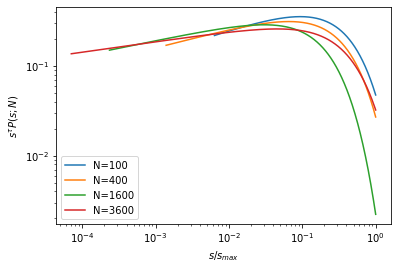

In [580]:
#  Scaling factors 
scaling_factors = [np.max(x_fit_10), np.max(x_fit_20), np.max(x_fit_40), np.max(x_fit_60)]

# Rescaling the avalanche_sizes data
avalanche_sizes_grid_10_scaled = (x_fit_10/scaling_factors[0]) 
avalanche_sizes_grid_20_scaled = x_fit_20/scaling_factors[1] 
avalanche_sizes_grid_40_scaled = x_fit_40/scaling_factors[2] 
avalanche_sizes_grid_60_scaled = x_fit_60/ scaling_factors[3] 


pdf_fit_10_scaled = pdf_fit_10 * ((x_fit_10)** 1.14)
pdf_fit_20_scaled = pdf_fit_20 * ((x_fit_20 ) ** (1.14))
pdf_fit_40_scaled = pdf_fit_40  * ((x_fit_40 ) ** (1.14))
pdf_fit_60_scaled = pdf_fit_60  * ((x_fit_60) ** (1.14))


# Plotting the collapsed data on a log-log plot
plt.figure()
plt.loglog(avalanche_sizes_grid_10_scaled, pdf_fit_10_scaled, label='N=100')
plt.loglog(avalanche_sizes_grid_20_scaled, pdf_fit_20_scaled, label='N=400')
plt.loglog(avalanche_sizes_grid_40_scaled, pdf_fit_40_scaled, label='N=1600')
plt.loglog(avalanche_sizes_grid_60_scaled, pdf_fit_60_scaled, label='N=3600')

plt.xlabel("$s/s_{max}}$")
plt.ylabel('$ s^{\u03C4} P(s;N)$')

#plt.title('Data Collapse')
plt.legend()
plt.savefig("grid_data_collapse.png", dpi = 300)
plt.show()